In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from statistics import mode 
import re

In [3]:
os.chdir("C:\\Users\\BROTHERS\\Desktop\\Data science project\\Titanic")

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'No. of passenger survived')

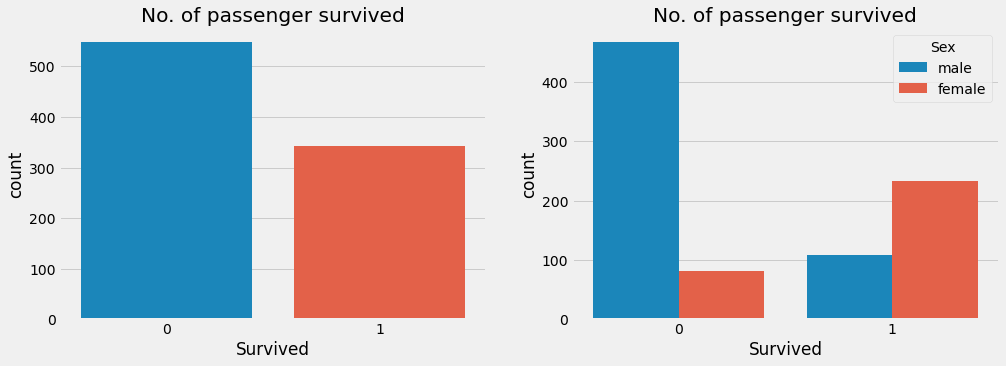

In [5]:
# lets look at the target feature(Survived)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title("No. of passenger survived")

plt.subplot(1,2,2)
sns.countplot(data=train, x='Survived',hue='Sex')
plt.title("No. of passenger survived")


### so the plot says that most of the people died during accident and females are the survival one as compare male so sex is very impotant feature in the our model 

Text(0.5, 1.0, 'Missing values in Traing dataset')

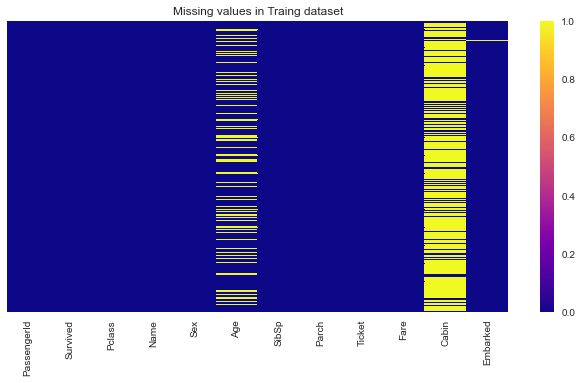

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cmap='plasma')
plt.title('Missing values in Traing dataset')

Text(0.5, 1.0, 'countplot for pclass')

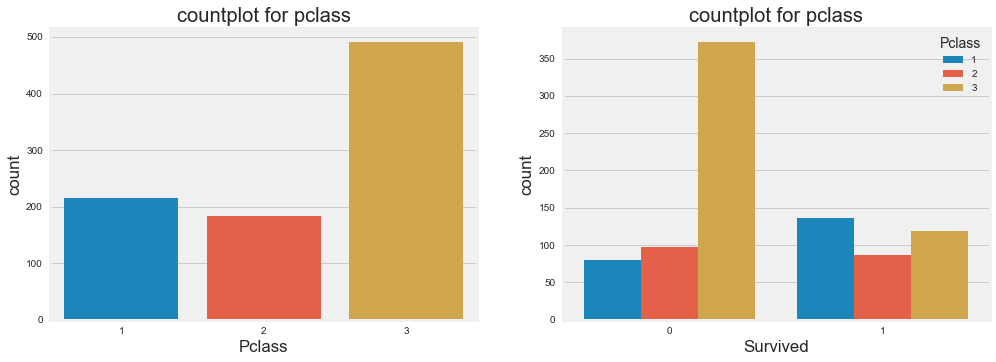

In [7]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('countplot for pclass')

plt.subplot(1,2,2)
sns.countplot(data=train,x='Survived',hue='Pclass')
plt.title('countplot for pclass')

#### mostly first class people survived as compare to second and third class so Pclass is also a good feature

Text(0.5, 1.0, 'Age Distribution')

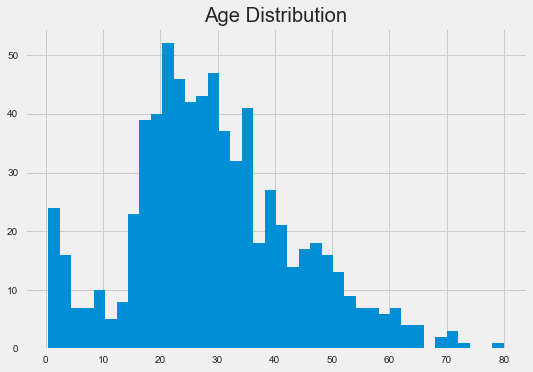

In [8]:
train['Age'].hist(bins=40)
plt.title('Age Distribution')

#### Age column has non-uniform data and many outliers

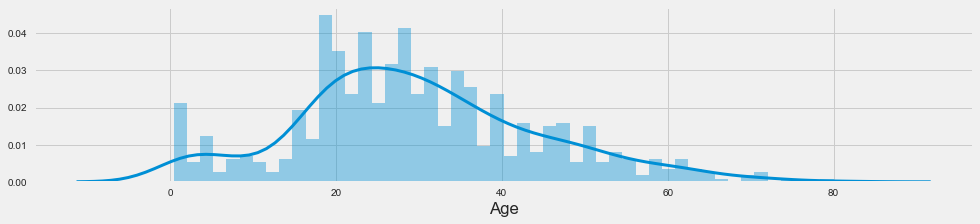

In [9]:
plt.figure(figsize=(15,3))
sns.distplot(train[(train['Age']>0)].Age,kde_kws={'lw': 3}, bins=50)

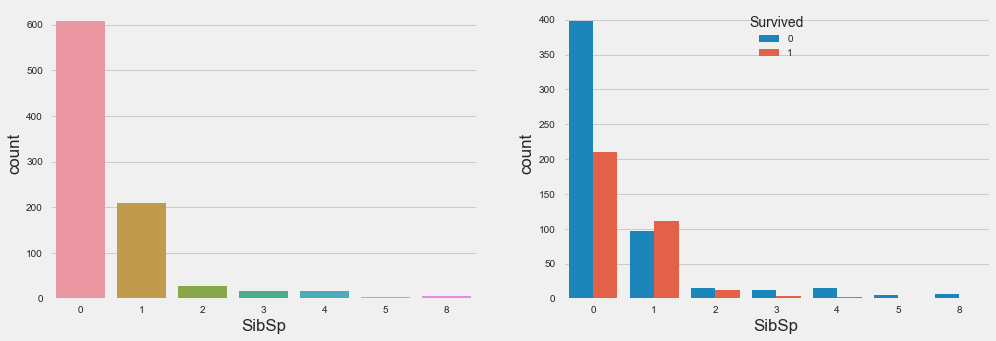

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['SibSp'])

plt.subplot(1,2,2)
sns.countplot(data=train,x='SibSp',hue='Survived')

##### Looks like single person Non-survived count is almost double than survived, while others have 50-50 % ratio

Text(0.5, 1.0, 'Number of Passenger survived')

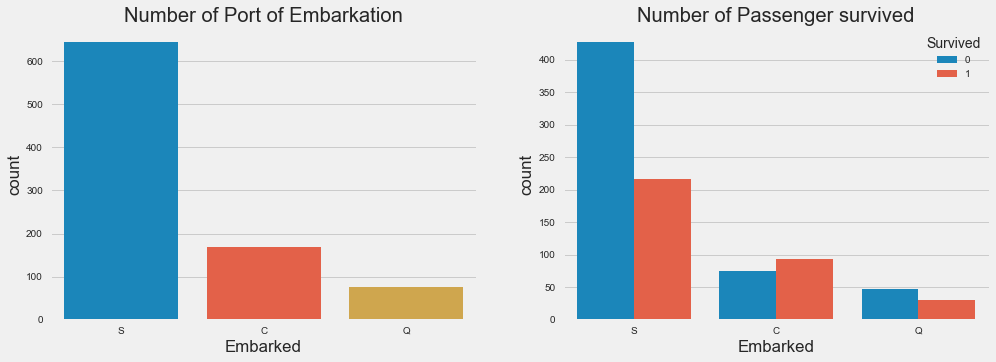

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of Embarkation')

plt.subplot(1,2,2)
sns.countplot(data=train,x='Embarked',hue='Survived')
plt.title('Number of Passenger survived')

##### No relationship

Text(0.5, 1.0, 'corelation matrix')

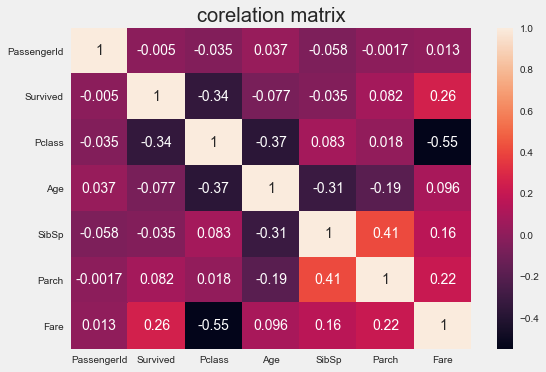

In [12]:
sns.heatmap(train.corr(),annot=True)
plt.title('corelation matrix')

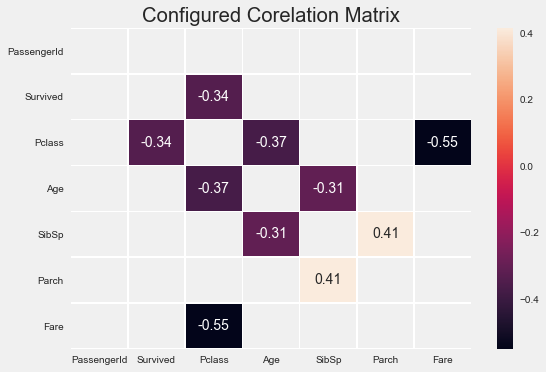

In [13]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

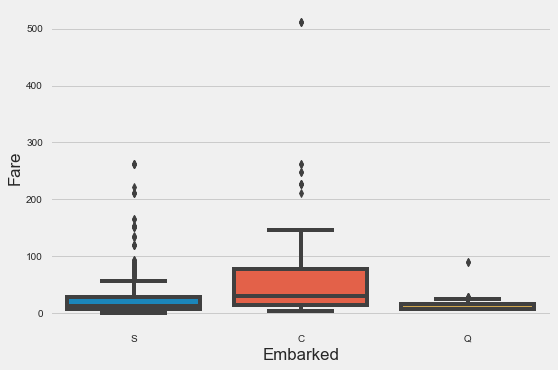

In [14]:
sns.boxplot(x='Embarked',y='Fare',data=train)

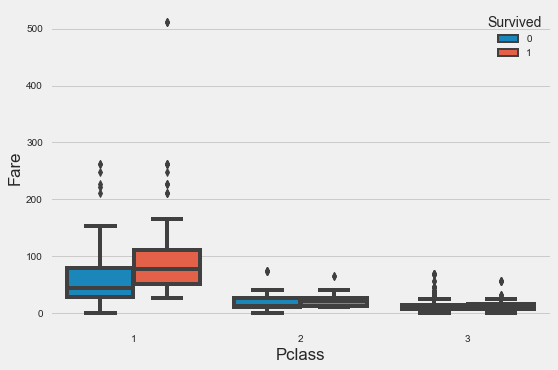

In [15]:
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=train)

##### Handle missing values

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

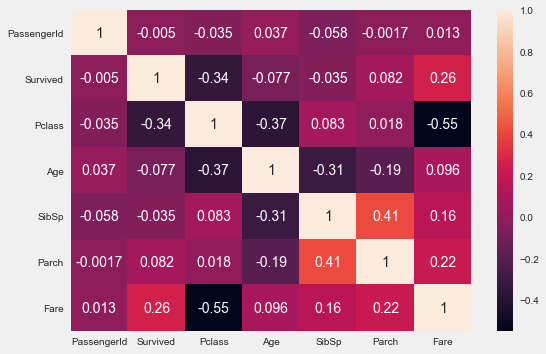

In [18]:
sns.heatmap(train.corr(),annot=True)

#### Pclass and age , as they had max relation so we are going to replace null values of age with the help of pclass

In [19]:
train.loc[train.Age.isnull(), 'Age']=train.groupby("Pclass").Age.transform('median')
test.loc[test.Age.isnull(), 'Age']=test.groupby("Pclass").Age.transform('median')

In [20]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train['Embarked']=train['Embarked'].fillna(mode(train['Embarked']))

In [22]:
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [23]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F2             3
              ..
D48            1
C62 C64        1
E46            1
D56            1
D11            1
Name: Cabin, Length: 147, dtype: int64

###### So many different values let's place missing values with U as "Unknown"

In [24]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

###### Feature Engineering

In [25]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

###### We can replace with dummy variables

In [26]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C

In [27]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

##### onehotencoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
temp=pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S','C','Q'])
train=train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp=pd.DataFrame(encoder.fit_transform(test[['Embarked']]).toarray(), columns=['S','C','Q'])
test=test.join(temp)
test.drop(columns='Embarked', inplace=True)


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0.0,0.0,1.0


In [30]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0.0,0.0,1.0


In [32]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,9,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,9,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,9,0.0,0.0,1.0


In [34]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [35]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [36]:
train['Name'].unique().tolist()


['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [37]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [38]:
train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [39]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

In [40]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [41]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,892,3,0,34.5,7.8292,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,893,3,1,47.0,7.0000,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,894,2,0,62.0,9.6875,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,895,3,0,27.0,8.6625,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,896,3,1,22.0,12.2875,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3


In [60]:
test1=test.drop(['PassengerId'], axis=1)

#### Dataset is complete now

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(x_train, y_train)

LogisticRegression(C=50, max_iter=10000)

In [45]:
prediction=logreg.predict(x_test)

In [61]:
prediction1=logreg.predict(test1)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy=confusion_matrix(y_test,prediction)

In [48]:
accuracy

array([[89, 11],
       [24, 55]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy=accuracy_score(y_test,prediction)
accuracy

0.8044692737430168

In [55]:
prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [62]:
prediction1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
pred=pd.DataFrame(prediction1)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission1.csv', index=False)

##### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
accuracy=confusion_matrix(y_test,y_pred)

In [68]:
accuracy

array([[81, 19],
       [32, 47]], dtype=int64)

In [69]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7150837988826816

#### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
y_pred1 = dt.predict(x_test)

In [73]:
y_pred1

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [74]:
accuracy1=confusion_matrix(y_test,y_pred1)

In [75]:
accuracy1=accuracy_score(y_test,y_pred1)
accuracy1

0.7877094972067039

#### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

In [78]:
Y_prediction

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [79]:
accuracy2=accuracy_score(y_test,Y_prediction)
accuracy2

0.8044692737430168

In [80]:
pred=pd.DataFrame(Y_prediction)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission2.csv', index=False)